In [2]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine, desc, func, inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from matplotlib import style
style.use('fivethirtyeight')

In [3]:
# Use the SQLAlchemy create_engine() function to connect to your SQLite database (1 point)
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# Use the SQLAlchemy automap_base() function to reflect your tables into classes (3 points)
Base = automap_base()
Base.prepare(autoload_with=engine)

In [5]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [6]:
# See columns and datatypes in each table
inspector = inspect(engine)
for item in Base.classes.keys():
    print(f"** Table: {item} **")
    columns = inspector.get_columns(item)
    for column in columns:
        tabs = "\t\t" if len(column["name"]) < 6 else "\t"
        print(f'{column["name"]}:{tabs}{column["type"]}')
    print("")

** Table: measurement **
id:		INTEGER
station:	TEXT
date:		TEXT
prcp:		FLOAT
tobs:		FLOAT

** Table: station **
id:		INTEGER
station:	TEXT
name:		TEXT
latitude:	FLOAT
longitude:	FLOAT
elevation:	FLOAT



In [7]:
# Save references to the classes named station and measurement (4 points)
Measurement = Base.classes["measurement"]
Station = Base.classes["station"]

In [8]:
# Link Python to the database by creating a SQLAlchemy session (1 point)
session = Session(bind=engine)

In [9]:
# Create a query that finds the most recent date in the dataset (8/23/2017) (2 points)
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date

'2017-08-23'

In [10]:
# Create a query that collects only the date and precipitation for the last year of data without passing the date as a variable (4 points) 

one_year_prior = dt.datetime.strptime(most_recent_date, r"%Y-%m-%d").date() - dt.timedelta(days=365)

In [11]:
# Sort the DataFrame by date (2 points) - done in ".order_by"
last_12_months = session.query(Measurement.date,
                               Measurement.prcp)\
                        .where(Measurement.date >= one_year_prior)\
                        .order_by(Measurement.date)\
                        .all()

In [12]:
# Save the query results to a Pandas DataFrame to create date and precipitation columns (2 points)
precipitation_df = pd.DataFrame(last_12_months, columns=["Date", "Precipitation"])
precipitation_df["Date"] = pd.to_datetime(precipitation_df["Date"], format=r"%Y-%m-%d")

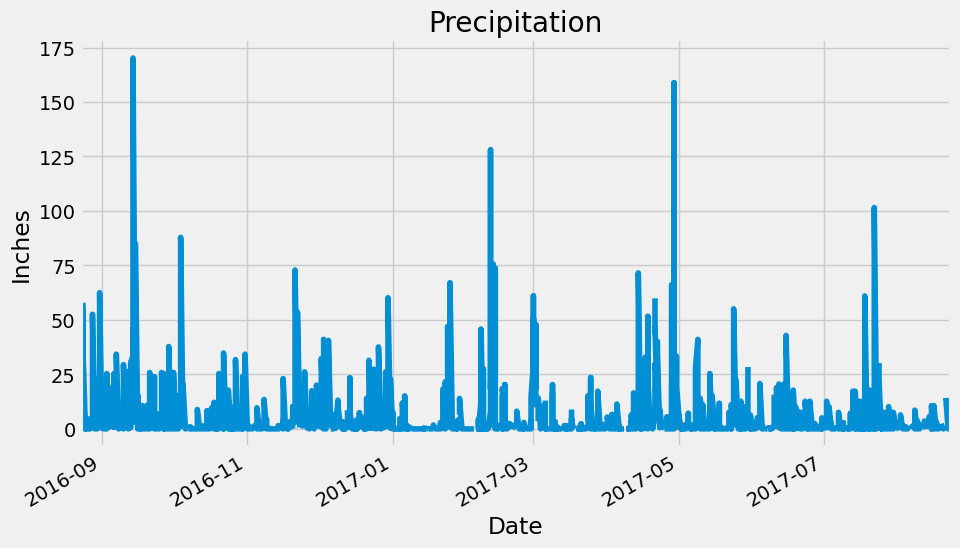

In [13]:
# Plot the results by using the DataFrame plot method with date as the x and precipitation as the y variables (4 points)
precipitation_df.plot(x="Date", y="Precipitation",
                      title="Precipitation", xlabel="Date", ylabel="Inches",
                      legend=False, figsize=(10, 6),
                      xlim=(one_year_prior, pd.Timestamp(most_recent_date)))
plt.show()

In [14]:
# Use Pandas to print the summary statistics for the precipitation data (2 points)
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


In [15]:
# Design a query that correctly finds the number of stations in the dataset (9) (2 points)
total_stations = session.query(func.count(Station.station)).distinct().scalar()
total_stations

9

In [16]:
# Design a query that correctly lists the stations and observation counts in descending order and finds the most active station (USC00519281) (2 points)
active_stations = session.query(Measurement.station,
                                func.count(Measurement.station).label("count"))\
                         .join(Station, Measurement.station == Station.station)\
                         .group_by(Measurement.station)\
                         .order_by(desc("count"))\
                         .all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Design a query that correctly finds the min, max, and average temperatures for the most active station (USC00519281) (3 points)
most_active_station = active_stations[0].station
most_active_data = session.query(func.min(Measurement.tobs).label("Min"),
                                 func.max(Measurement.tobs).label("Max"),
                                 func.avg(Measurement.tobs).label("Avg"))\
                           .where(Measurement.station == most_active_station)\
                           .one()
most_active_data

(12.2, 29.4, 22.03582251082252)

In [18]:
# Design a query to get the previous 12 months of temperature observation (TOBS) data that filters by the station that has the greatest number of observations (3 points)
most_active_last_12_months = session.query(Measurement.tobs)\
                                    .where(Measurement.station == most_active_station,
                                           Measurement.date >= one_year_prior)\
                                    .all()

In [19]:
# Save the query results to a Pandas DataFrame (2 points)
most_active_station_temps = [value for (value,) in most_active_last_12_months]
most_active_station_temps

[25.0,
 25.0,
 26.7,
 26.7,
 23.9,
 22.8,
 25.6,
 25.0,
 25.6,
 26.7,
 26.7,
 25.6,
 25.6,
 25.6,
 22.8,
 23.3,
 26.7,
 26.1,
 25.0,
 26.7,
 24.4,
 26.1,
 23.9,
 26.1,
 25.6,
 26.1,
 25.6,
 25.6,
 24.4,
 23.3,
 25.0,
 25.6,
 26.1,
 26.1,
 25.0,
 26.7,
 25.6,
 25.6,
 25.6,
 25.0,
 26.1,
 26.1,
 26.1,
 26.1,
 23.9,
 24.4,
 22.8,
 22.2,
 21.7,
 25.0,
 26.1,
 25.6,
 26.1,
 25.0,
 26.1,
 25.0,
 25.6,
 25.6,
 25.6,
 25.6,
 25.0,
 23.3,
 23.9,
 24.4,
 22.8,
 24.4,
 23.3,
 25.0,
 24.4,
 24.4,
 23.3,
 23.9,
 23.9,
 23.9,
 23.9,
 21.7,
 17.2,
 21.1,
 20.0,
 19.4,
 25.0,
 23.3,
 25.0,
 24.4,
 24.4,
 23.9,
 24.4,
 23.9,
 22.8,
 23.9,
 22.8,
 23.9,
 23.3,
 23.9,
 23.3,
 23.9,
 22.8,
 23.9,
 22.8,
 22.8,
 23.3,
 21.1,
 22.2,
 21.1,
 19.4,
 19.4,
 20.6,
 21.1,
 20.0,
 20.6,
 20.6,
 18.9,
 18.3,
 20.0,
 16.7,
 23.9,
 21.1,
 20.6,
 24.4,
 24.4,
 23.3,
 22.8,
 21.7,
 23.3,
 23.3,
 22.2,
 21.7,
 22.2,
 23.3,
 20.6,
 19.4,
 22.2,
 21.1,
 17.8,
 17.2,
 17.2,
 16.7,
 21.1,
 21.1,
 16.7,
 16.7,
 17.2,
 18.3,

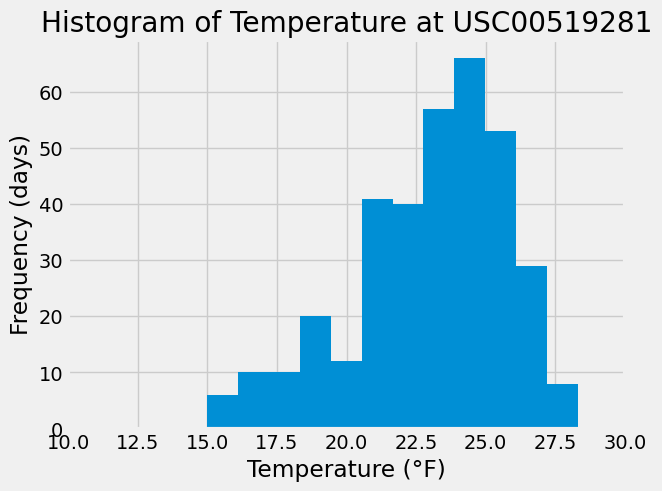

In [20]:
# Correctly plot a histogram with bins=12 for the last year of data using tobs as the column to count. (4 points)
if 'most_active_station_temps' in locals():
    plt.hist(most_active_station_temps, bins=12)
    plt.title(f"Histogram of Temperature at {most_active_station}")
    plt.xlabel("Temperature (°F)")
    plt.ylabel("Frequency (days)")
    plt.xlim(10, 30)
    plt.show()
else:
    print("Temperature data is not available. Please retrieve the data first.")

In [21]:
# Close your session at the end of your notebook (1 point)
session.close()